In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [109]:
table = pd.read_excel('Avon_Data_Clean.xlsx')

In [110]:
table.columns

Index([u'cv__Campaign__r.Name', u'Year', u'City', u'Walk_Participation',
       u'Walk_Status', u'Classification', u'FUL_CHECKED',
       u'cv__Registration_Date__c', u'Withdrew', u'Active',
       u'Registration_Days_Out', u'Opportunity_Amount', u'AF_PROMO__c',
       u'AF_REG_WAY_OF_ENTRY__c', u'Entry_DSG', u'Entry_Mail',
       u'Entry_On Event', u'Entry_Orientation Meeting',
       u'Entry_Phone/Local Office', u'Entry_Recruitment Activity',
       u'Entry_Training/Prep Activity', u'Entry_Website', u'AF_REG_SOURCE__c',
       u'AF_REG_SOURCE_DETAIL__c', u'AF_LEAD_GENERATED_DATE__c',
       u'AF_LEAD_SOURCE__c', u'AF_LEAD_SUBSOURCE__c', u'Age_During_Event__c',
       u'cv__Team__r.Name', u'Total_Raised_Master'],
      dtype='object')

In [111]:
table_df = pd.DataFrame(table)

In [122]:
del table_df['cv__Team__r.Name']
del table_df['AF_LEAD_GENERATED_DATE__c'] 
del table_df['AF_LEAD_SUBSOURCE__c'] 
del table_df['AF_REG_SOURCE_DETAIL__c'] 

In [145]:
table_df['City'].unique()

array([u'New York', u'Boston', u'Charlotte', u'Chicago', u'Houston',
       u'Rocky Mountains', u'San Francisco', u'Santa Barbara',
       u'Washington DC'], dtype=object)

In [143]:
table_df.corr()

,Year,FUL_CHECKED,Withdrew,Active,Registration_Days_Out,Opportunity_Amount,Entry_DSG,Entry_Mail,Entry_On Event,Entry_Orientation Meeting,Entry_Phone/Local Office,Entry_Recruitment Activity,Entry_Training/Prep Activity,Entry_Website,Age_During_Event__c,Total_Raised_Master
Year,1.000000,-0.129413,0.021392,-0.021472,0.227116,-0.400481,0.091484,-0.027541,0.212685,0.026874,-0.263378,-0.017001,-0.037481,-0.003394,0.124798,-0.052649
FUL_CHECKED,-0.129413,1.000000,-0.485779,0.485823,-0.075554,0.085887,-0.101080,-0.016495,-0.055272,-0.001275,0.004033,-0.002710,-0.004874,0.087196,0.063111,0.415710
Withdrew,0.021392,-0.485779,1.000000,-0.999911,0.075624,-0.030238,0.077072,0.006850,0.033737,0.004469,0.003399,-0.000703,-0.002215,-0.055728,0.023612,-0.217479
Active,-0.021472,0.485823,-0.999911,1.000000,-0.075599,0.030293,-0.077057,-0.006845,-0.033848,-0.004466,-0.003373,0.000710,0.002218,0.055790,-0.023632,0.217502
Registration_Days_Out,0.227116,-0.075554,0.075624,-0.075599,1.000000,-0.325991,-0.058497,-0.010116,0.703746,-0.012619,-0.200496,-0.047077,-0.044216,-0.376154,0.156182,-0.057272
Opportunity_Amount,-0.400481,0.085887,-0.030238,0.030293,-0.325991,1.000000,-0.032398,0.019380,-0.369698,-0.023820,-0.147373,-0.035191,-0.018708,0.432105,-0.060431,0.047634
Entry_DSG,0.091484,-0.101080,0.077072,-0.077057,-0.058497,-0.032398,1.000000,-0.014615,-0.087609,-0.008191,-0.076901,-0.022300,-0.010102,-0.203744,-0.003465,-0.040940
Entry_Mail,-0.027541,-0.016495,0.006850,-0.006845,-0.010116,0.019380,-0.014615,1.000000,-0.041947,-0.003922,-0.036821,-0.010677,-0.004837,-0.097553,0.027613,0.001153
Entry_On Event,0.212685,-0.055272,0.033737,-0.033848,0.703746,-0.369698,-0.087609,-0.041947,1.000000,-0.023509,-0.220720,-0.064005,-0.028994,-0.584781,0.127443,-0.079984
Entry_Orientation Meeting,0.026874,-0.001275,0.004469,-0.004466,-0.012619,-0.023820,-0.008191,-0.003922,-0.023509,1.000000,-0.020636,-0.005984,-0.002711,-0.054674,0.006148,0.001686


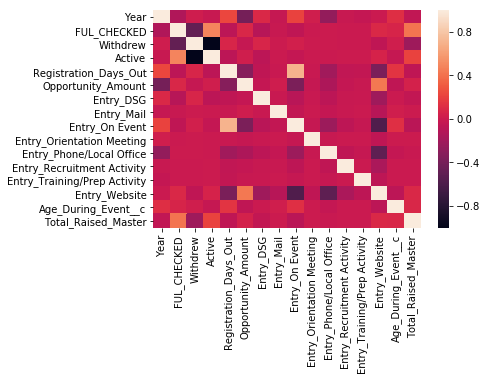

In [136]:
sns.heatmap(table.corr())

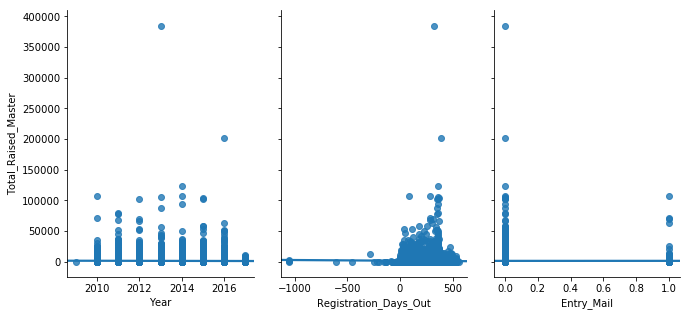

In [137]:
sns.pairplot(table, x_vars=['Year', 'Registration_Days_Out','Entry_Mail'], y_vars='Total_Raised_Master', size=4.5, aspect=0.7, kind='reg')

In [151]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [156]:
X = table_df[["cv__Campaign__r.Name", "Year", 
              "City", "Walk_Participation", "Walk_Status", "Walk_Status", 
              "Registration_Days_Out", "Opportunity_Amount", 
              "AF_PROMO__c", "AF_REG_WAY_OF_ENTRY__c", 
              "AF_REG_SOURCE__c", "AF_LEAD_SOURCE__c", "Age_During_Event__c"]]


In [157]:
le = preprocessing.LabelEncoder()

X1 = X.apply(le.fit_transform)
X1.head()

,cv__Campaign__r.Name,Year,City,Walk_Participation,Walk_Status,Walk_Status,Registration_Days_Out,Opportunity_Amount,AF_PROMO__c,AF_REG_WAY_OF_ENTRY__c,AF_REG_SOURCE__c,AF_LEAD_SOURCE__c,Age_During_Event__c
0,0,0,4,2,0,0,9,1603,0,8,11,15,37
1,1,1,0,0,0,0,180,468,8032,8,42,27,22
2,1,1,0,0,0,0,141,20,8032,5,42,15,56
3,1,1,0,0,0,0,181,32,8032,8,11,15,762
4,1,1,0,0,0,0,182,32,8032,8,11,15,47


In [177]:
A = list(X1)
A

[u'cv__Campaign__r.Name',
 u'Year',
 u'City',
 u'Walk_Participation',
 u'Walk_Status',
 u'Walk_Status',
 u'Registration_Days_Out',
 u'Opportunity_Amount',
 u'AF_PROMO__c',
 u'AF_REG_WAY_OF_ENTRY__c',
 u'AF_REG_SOURCE__c',
 u'AF_LEAD_SOURCE__c',
 u'Age_During_Event__c']

In [184]:
A = list(X1)
model_summary = []

for i in A:
    X = X1[i]
    Y = table_df["Total_Raised_Master"]
    x = np.asarray(X)
    y = np.asarray(Y)
    model = smf.OLS(y,x).fit()
    print model.summary()
    #predictions = model.predict(x)

#for i in model_summary:
#    print model_summary[i].summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 4.614e+04
Date:                Thu, 08 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:30:26   Log-Likelihood:            -1.5159e+06
No. Observations:              165059   AIC:                         3.032e+06
Df Residuals:                  165058   BIC:                         3.032e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.0708      0.159    214.794      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 5.099e+04
Date:                Thu, 08 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:30:26   Log-Likelihood:            -1.5141e+06
No. Observations:              165059   AIC:                         3.028e+06
Df Residuals:                  165058   BIC:                         3.028e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.8956      0.022    225.801      0.0